Alumno: Luna Angeles Jose Alberto
Matricula: 240110464
[índice](index.ipynb)

📘 Proyecto de Estadística: Análisis de Productos Defectuosos en Producción

Objetivo:
Este análisis tiene como finalidad estudiar la distribución de productos defectuosos en una muestra de 500 lotes de producción. Los datos representan la cantidad de unidades defectuosas por lote, con valores enteros del 1 al 5. A partir de estos datos, se elaboran tablas de frecuencias y distintas representaciones gráficas para facilitar la interpretación y toma de decisiones en un entorno de control de calidad industrial.

TABLA DE FRECUENCIA
   Productos Defectuosos  Frecuencia Absoluta  Frecuencia Absoluta Acumulada  \
0                      1                   89                             89   
1                      2                  152                            241   
2                      3                  153                            394   
3                      4                   76                            470   
4                      5                   30                     

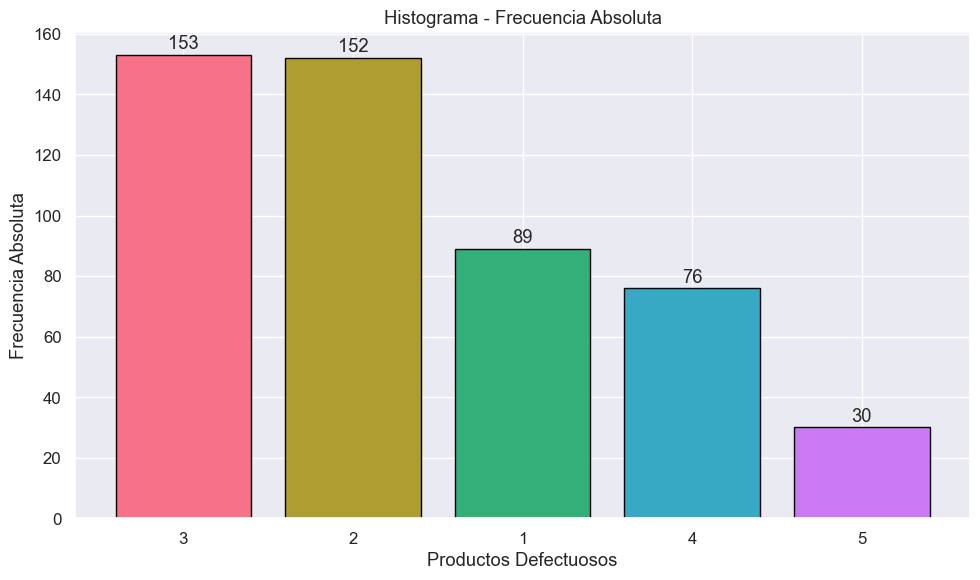

📌 Este histograma muestra la frecuencia con la que ocurren distintos niveles de defectos por lote. Se observa que el valor más común es 2 defectuosos.


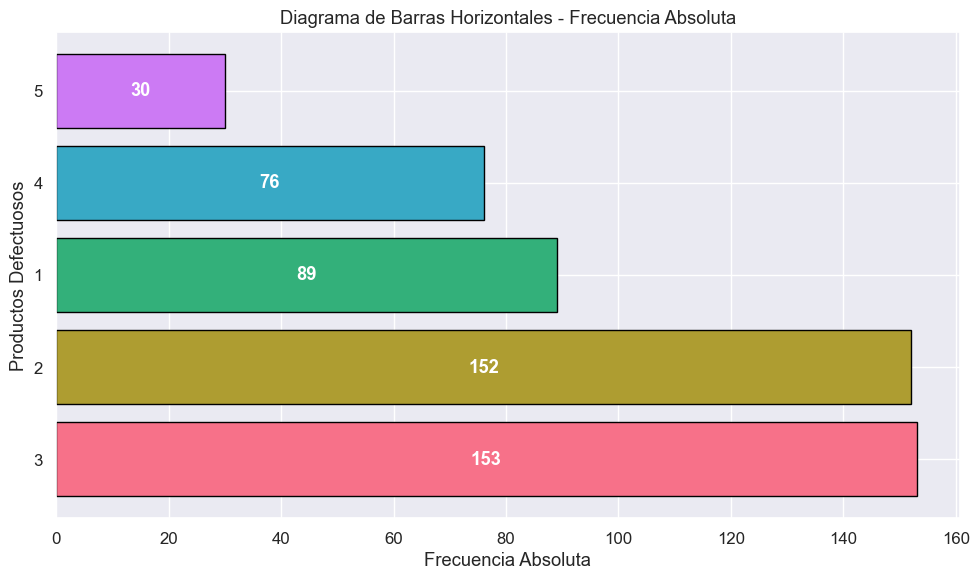

📌 Este diagrama permite visualizar de forma horizontal la misma información que el histograma, facilitando la comparación visual entre categorías.


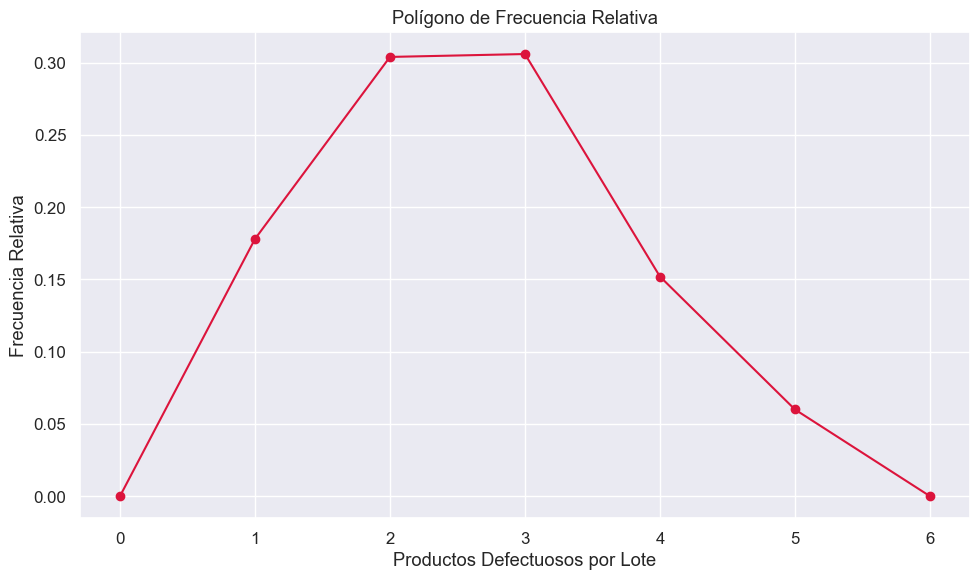

📌 El polígono de frecuencia muestra cómo se distribuyen los porcentajes relativos de defectos. Se observa un pico en 2 defectuosos, lo que indica su mayor ocurrencia relativa.


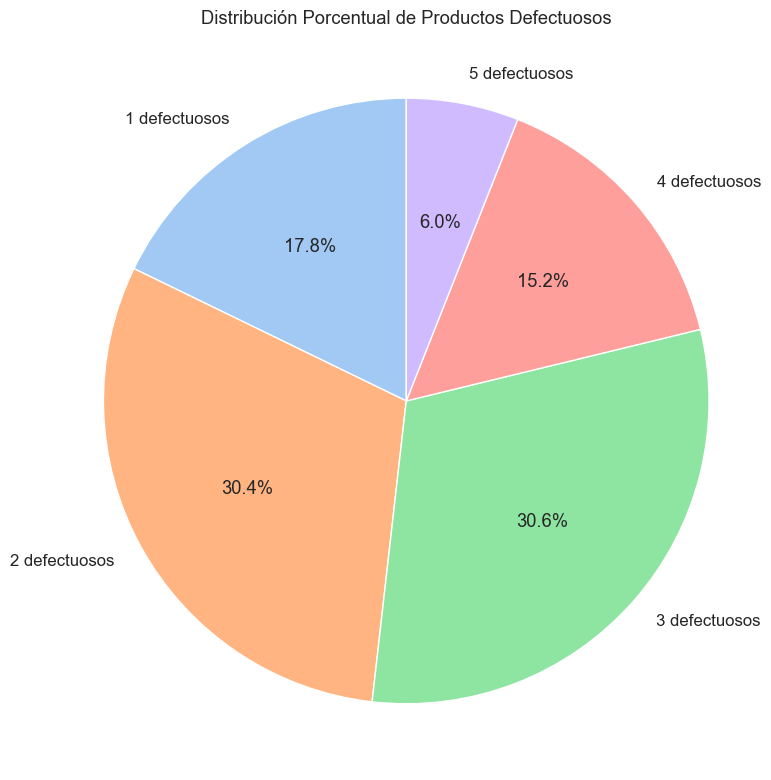

📌 Este diagrama de pastel permite visualizar de forma inmediata el porcentaje de lotes que presentan cierta cantidad de defectos. Los lotes con 2 defectuosos representan la mayor proporción del total.


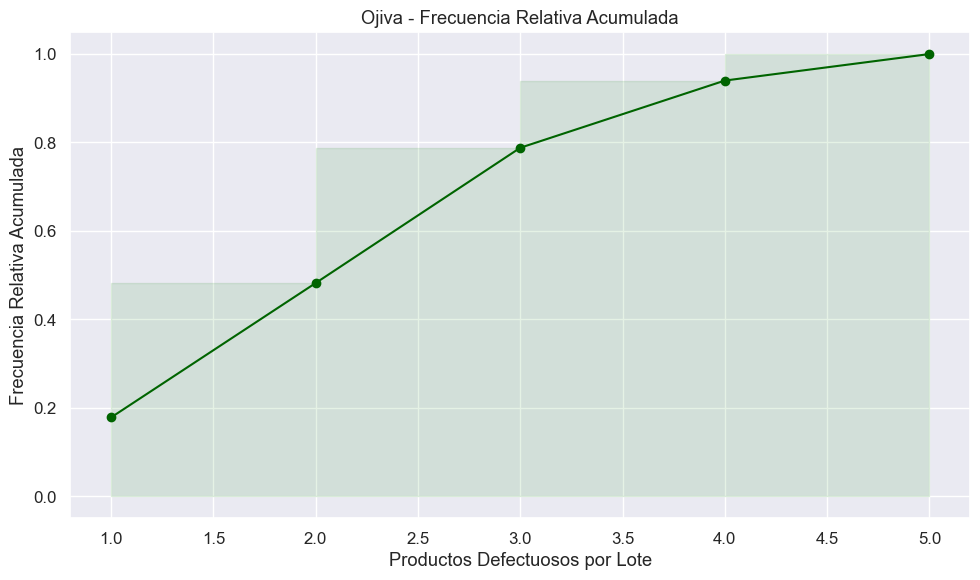

📌 Esta ojiva muestra cómo se acumula el porcentaje total de lotes conforme aumentan los defectos. Por ejemplo, hasta los lotes con 3 defectos se ha acumulado cerca del 80% del total, lo que indica que la mayoría de los lotes tienen pocos defectos.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
plt.style.use("seaborn-v0_8-whitegrid")
sns.set(font_scale=1.1)
np.random.seed(42)
print("📘 Proyecto de Estadística: Análisis de Productos Defectuosos en Producción\n")
print("Objetivo:\nEste análisis tiene como finalidad estudiar la distribución de productos defectuosos en una muestra de 500 lotes de producción. Los datos representan la cantidad de unidades defectuosas por lote, con valores enteros del 1 al 5. A partir de estos datos, se elaboran tablas de frecuencias y distintas representaciones gráficas para facilitar la interpretación y toma de decisiones en un entorno de control de calidad industrial.\n")


# ---------------------------------------------
# 1. Generación de datos
# ---------------------------------------------
# Simular 500 lotes con número de productos defectuosos del 1 al 5
datos_defectuosos = np.random.choice([1, 2, 3, 4, 5], size=500, p=[0.15, 0.35, 0.30, 0.15, 0.05])

# Calcular frecuencias
tabla = pd.Series(datos_defectuosos).value_counts().sort_index()
valores = tabla.index
frecuencia_absoluta = tabla.values
frecuencia_relativa = frecuencia_absoluta / frecuencia_absoluta.sum()
frecuencia_absoluta_acumulada = np.cumsum(frecuencia_absoluta)
frecuencia_relativa_acumulada = np.cumsum(frecuencia_relativa)

# Crear tabla de frecuencia
df_frecuencia = pd.DataFrame({
    'Productos Defectuosos': valores,
    'Frecuencia Absoluta': frecuencia_absoluta,
    'Frecuencia Absoluta Acumulada': frecuencia_absoluta_acumulada,
    'Frecuencia Relativa': frecuencia_relativa.round(4),
    'Frecuencia Relativa Acumulada': frecuencia_relativa_acumulada.round(4)
})

# Mostrar la tabla
print("TABLA DE FRECUENCIA")
print(df_frecuencia)

# ---------------------------------------------
# 2. Histograma - Frecuencia Absoluta
# ---------------------------------------------
df_ordenado = df_frecuencia.sort_values(by='Frecuencia Absoluta', ascending=False)
colores = sns.color_palette("husl", len(df_ordenado))

plt.figure(figsize=(10, 6))
barras = plt.bar(df_ordenado['Productos Defectuosos'].astype(str),
                 df_ordenado['Frecuencia Absoluta'],
                 color=colores, edgecolor='black')

for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura + 2, str(altura), ha='center')

plt.title('Histograma - Frecuencia Absoluta')
plt.xlabel('Productos Defectuosos')
plt.ylabel('Frecuencia Absoluta')
plt.tight_layout()
plt.show()

print("📌 Este histograma muestra la frecuencia con la que ocurren distintos niveles de defectos por lote. Se observa que el valor más común es 2 defectuosos.")

# ---------------------------------------------
# 3. Diagrama de Barras Horizontales
# ---------------------------------------------
plt.figure(figsize=(10, 6))
barras_h = plt.barh(df_ordenado['Productos Defectuosos'].astype(str),
                    df_ordenado['Frecuencia Absoluta'],
                    color=colores, edgecolor='black')

for barra in barras_h:
    ancho = barra.get_width()
    plt.text(ancho / 2, barra.get_y() + barra.get_height() / 2,
             str(int(ancho)), ha='center', va='center', color='white', fontweight='bold')

plt.title('Diagrama de Barras Horizontales - Frecuencia Absoluta')
plt.xlabel('Frecuencia Absoluta')
plt.ylabel('Productos Defectuosos')
plt.tight_layout()
plt.show()

print("📌 Este diagrama permite visualizar de forma horizontal la misma información que el histograma, facilitando la comparación visual entre categorías.")

# ---------------------------------------------
# 4. Polígono de Frecuencia Relativa
# ---------------------------------------------
valores_ext = [df_frecuencia['Productos Defectuosos'].min() - 1] + \
               list(df_frecuencia['Productos Defectuosos']) + \
              [df_frecuencia['Productos Defectuosos'].max() + 1]

frecuencia_ext = [0.0] + list(df_frecuencia['Frecuencia Relativa']) + [0.0]

plt.figure(figsize=(10, 6))
plt.plot(valores_ext, frecuencia_ext, marker='o', linestyle='-', color='crimson')
plt.title('Polígono de Frecuencia Relativa')
plt.xlabel('Productos Defectuosos por Lote')
plt.ylabel('Frecuencia Relativa')
plt.grid(True)
plt.tight_layout()
plt.show()

print("📌 El polígono de frecuencia muestra cómo se distribuyen los porcentajes relativos de defectos. Se observa un pico en 2 defectuosos, lo que indica su mayor ocurrencia relativa.")

# ---------------------------------------------
# 5. Diagrama de Pastel - Frecuencia Relativa
# ---------------------------------------------
plt.figure(figsize=(8, 8))
plt.pie(df_frecuencia['Frecuencia Relativa'],
        labels=[f"{int(v)} defectuosos" for v in df_frecuencia['Productos Defectuosos']],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("pastel"))

plt.title('Distribución Porcentual de Productos Defectuosos')
plt.axis('equal')
plt.tight_layout()
plt.show()

print("📌 Este diagrama de pastel permite visualizar de forma inmediata el porcentaje de lotes que presentan cierta cantidad de defectos. Los lotes con 2 defectuosos representan la mayor proporción del total.")

# ---------------------------------------------
# 6. Ojiva - Frecuencia Relativa Acumulada
# ---------------------------------------------
x = df_frecuencia['Productos Defectuosos']
y = df_frecuencia['Frecuencia Relativa Acumulada']

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color='darkgreen')
plt.fill_between(x, y, step='pre', alpha=0.1, color='green')
plt.title('Ojiva - Frecuencia Relativa Acumulada')
plt.xlabel('Productos Defectuosos por Lote')
plt.ylabel('Frecuencia Relativa Acumulada')
plt.grid(True)
plt.tight_layout()
plt.show()

print("📌 Esta ojiva muestra cómo se acumula el porcentaje total de lotes conforme aumentan los defectos. Por ejemplo, hasta los lotes con 3 defectos se ha acumulado cerca del 80% del total, lo que indica que la mayoría de los lotes tienen pocos defectos.")